Import libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from timeit import default_timer as timer
from datetime import timedelta

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_graphviz
from holoviews.ipython import display

Train data (longer)

In [77]:
path = "../12CPU_30RAM/43200s/allGroup/merged.csv"
df = pd.read_csv(path).dropna(inplace=False)

df = df.iloc[:,1:]

#single merge file (not grouped)
#df = df.iloc[:,2:]

#methods.csv
if "methods" in path:
    endpoint_map = {
        'do-register': 0,
        'add-sell-offer': 1,
        'add-buy-offer': 2,
        'get-stock-data': 3,
        'add-company': 4,
        'get-stock-users-and-companies': 5

    }
    # zastosowanie mapowania na kolumnę endpointUrl
    df['endpointUrl'] = df['endpointUrl'].replace(endpoint_map)


if 'replicaId' in df.columns:
    df['replicaId'] = pd.factorize(df['replicaId'])[0]

# zaokrąglij dane procentowe zużycia do dwóch miejsc po przecinku
cols_to_round = [col for col in df.columns if 'memoryUsage' in col or 'cpuUsage' in col]
if cols_to_round:
    df[cols_to_round] = df[cols_to_round].round(2)

df.info()
print(df.head())

#stock,trading

#methods: timestamp,apiTime,applicationTime,databaseTime,endpointUrl,queueSizeForward,queueSizeBack,replicaId
#stock : timestamp,cpuUsage,memoryUsage,replicaId
#trading: timestamp,applicationTime,databaseTime,numberOfSellOffers,numberOfBuyOffers,replicaId
#traffic: timestamp,cpuUsage,memoryUsage
#merged: ,timestamp,apiTime,applicationTime,databaseTime,endpointUrl,queueSizeForward,queueSizeBack,st_cpuUsage,st_memoryUsage,trad_applicationTime,trad_databaseTime,trad_numberOfSellOffers,trad_numberOfBuyOffers,traf_cpuUsage,traf_memoryUsage

#df.loc[:,[3, 5]]

#X = df.drop(["apiTime", "endpointUrl", "applicationTime", "databaseTime", "replicaId"], axis=1);
#X = df.filter(["queueSizeBack", "trad_numberOfBuyOffers", "trad_numberOfSellOffers"])
X_train = df.drop(["endpointUrl"], axis=1)
Y_train = df['endpointUrl'];


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44937168 entries, 0 to 44937167
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   apiTime                  int64  
 1   applicationTime          int64  
 2   databaseTime             int64  
 3   endpointUrl              int64  
 4   queueSizeForward         int64  
 5   queueSizeBack            int64  
 6   st_cpuUsage              float64
 7   st_memoryUsage           float64
 8   trad_applicationTime     int64  
 9   trad_databaseTime        int64  
 10  trad_numberOfSellOffers  int64  
 11  trad_numberOfBuyOffers   int64  
 12  traf_cpuUsage            float64
 13  traf_memoryUsage         float64
dtypes: float64(4), int64(10)
memory usage: 4.7 GB
   apiTime  applicationTime  databaseTime  endpointUrl  queueSizeForward  \
0      485              244           102            0                 0   
1      506              262           120            0                 0  

Test data (shorter)

In [91]:
path = "../12CPU_30RAM/32400s/allGroup/merged.csv"
df = pd.read_csv(path).dropna(inplace=False)

df = df.iloc[:,1:]

#single merge file (not grouped)
#df = df.iloc[:,2:]

#methods.csv
if "methods" in path:
    endpoint_map = {
        'do-register': 0,
        'add-sell-offer': 1,
        'add-buy-offer': 2,
        'get-stock-data': 3,
        'add-company': 4,
        'get-stock-users-and-companies': 5

    }
    # zastosowanie mapowania na kolumnę endpointUrl
    df['endpointUrl'] = df['endpointUrl'].replace(endpoint_map)


if 'replicaId' in df.columns:
    df['replicaId'] = pd.factorize(df['replicaId'])[0]

# zaokrąglij dane procentowe zużycia do dwóch miejsc po przecinku
cols_to_round = [col for col in df.columns if 'memoryUsage' in col or 'cpuUsage' in col]
if cols_to_round:
    df[cols_to_round] = df[cols_to_round].round(2)

df.info()
print(df.head())

#stock,trading

#methods: timestamp,apiTime,applicationTime,databaseTime,endpointUrl,queueSizeForward,queueSizeBack,replicaId
#stock : timestamp,cpuUsage,memoryUsage,replicaId
#trading: timestamp,applicationTime,databaseTime,numberOfSellOffers,numberOfBuyOffers,replicaId
#traffic: timestamp,cpuUsage,memoryUsage
#merged: ,timestamp,apiTime,applicationTime,databaseTime,endpointUrl,queueSizeForward,queueSizeBack,st_cpuUsage,st_memoryUsage,trad_applicationTime,trad_databaseTime,trad_numberOfSellOffers,trad_numberOfBuyOffers,traf_cpuUsage,traf_memoryUsage

#df.loc[:,[3, 5]]

#X = df.drop(["apiTime", "endpointUrl", "applicationTime", "databaseTime", "replicaId"], axis=1);
#X = df.filter(["queueSizeBack", "trad_numberOfBuyOffers", "trad_numberOfSellOffers"])
X_test = df.drop(["endpointUrl"], axis=1)
Y_test = df['endpointUrl'];


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36956109 entries, 0 to 36956108
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   apiTime                  int64  
 1   applicationTime          int64  
 2   databaseTime             int64  
 3   endpointUrl              int64  
 4   queueSizeForward         int64  
 5   queueSizeBack            int64  
 6   st_cpuUsage              float64
 7   st_memoryUsage           float64
 8   trad_applicationTime     int64  
 9   trad_databaseTime        int64  
 10  trad_numberOfSellOffers  int64  
 11  trad_numberOfBuyOffers   int64  
 12  traf_cpuUsage            float64
 13  traf_memoryUsage         float64
dtypes: float64(4), int64(10)
memory usage: 3.9 GB
   apiTime  applicationTime  databaseTime  endpointUrl  queueSizeForward  \
0      434              243            98            0                 0   
1      441              240            90            0                 0  

Definition of model

In [79]:
#split test - use for only one csv
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

start = timer()

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

end = timer()
print(timedelta(seconds=end-start))

0:07:47.025278


In [92]:
predictions = model.predict(X_test)
print(predictions)

[5. 5. 3. ... 2. 5. 2.]


In [93]:
print(X_test.head())

   apiTime  applicationTime  databaseTime  queueSizeForward  queueSizeBack  \
0      434              243            98                 0              0   
1      441              240            90                 0              0   
2      442              132             6                 0              0   
3      461              136             6                 0              0   
4      546              131             5                 0              0   

   st_cpuUsage  st_memoryUsage  trad_applicationTime  trad_databaseTime  \
0          0.4            0.83                 13339              11215   
1          0.4            0.83                 13339              11215   
2          0.4            0.83                 13339              11215   
3          0.4            0.83                 13339              11215   
4          0.4            0.83                 13339              11215   

   trad_numberOfSellOffers  trad_numberOfBuyOffers  traf_cpuUsage  \
0          

Calculating accuracy of prediction

In [94]:
model_Y_predicted = model.predict(X_test)
model_RMSE = np.sqrt(mean_squared_error(Y_test, model_Y_predicted))
round(model_RMSE, 4)

0.3702

Tree graph draw

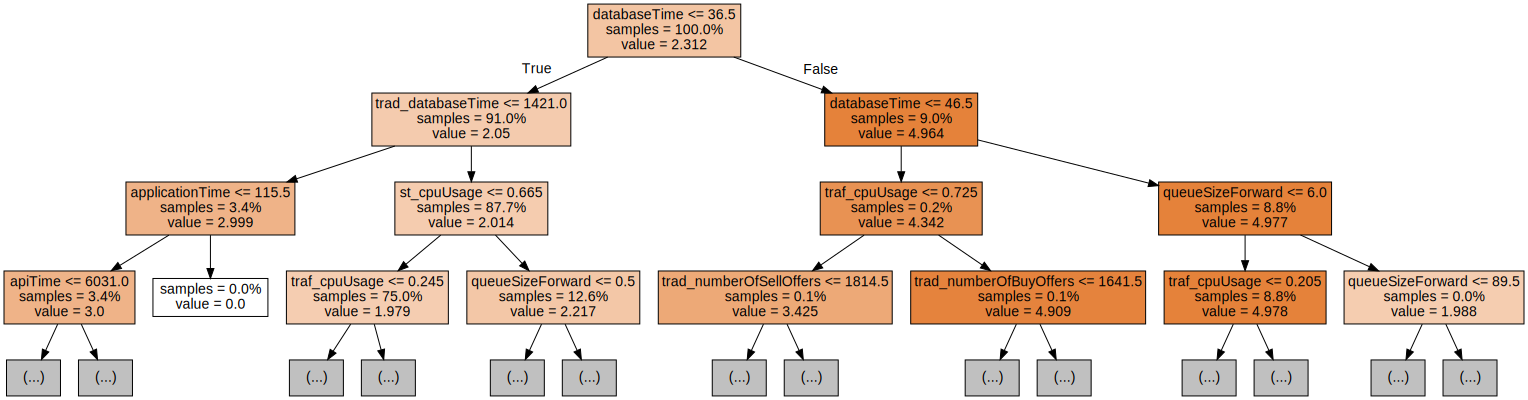

In [8]:
tree_data = export_graphviz(model,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=3,
                           impurity=False,
                           proportion=True)
graph = graphviz.Source(tree_data)
display(graph)